Adatok beolvasása

In [2]:
import pandas as pd

pd.options.display.max_colwidth = 500

df = pd.read_csv("data/trump20200926.csv")

df['letoltes_datum'] = pd.to_datetime(df.letoltes_datum, format='%Y-%m-%d')
df['tweetCreated'] = pd.to_datetime(df.tweetCreated, format='%Y-%m-%d')
df['userCreateDt'] = pd.to_datetime(df.userCreateDt, format='%Y-%m-%d')

print(df.shape)

df.dtypes


(10000, 24)


tweetID                     int64
tweetText                  object
tweetRetweetCt              int64
tweetFavoriteCt             int64
tweetSource                object
tweetCreated       datetime64[ns]
userID                      int64
userScreen                 object
userName                   object
userCreateDt       datetime64[ns]
userDesc                   object
userFollowerCt              int64
userFriendsCt               int64
userLocation               object
userTimezone              float64
Coordinates                object
GeoEnabled                   bool
Language                  float64
TweetPlace                 object
text                       object
text2                      object
text3                      object
keresoszo                  object
letoltes_datum     datetime64[ns]
dtype: object

Írásjelek törlése

In [3]:

#https://www.kaggle.com/ragnisah/text-data-cleaning-tweets-analysis

import string
import re
string.punctuation

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['tweetText'].apply(lambda x: remove_punct(x))
df[['tweetText', 'Tweet_punct']].head(10)


    
    

,tweetText,Tweet_punct
0,"RT @RealDLHughley: Biden has been endorsed by Ex Presidents and Ex Presidential candidates, Governors, Military Officers, Foreign Policy ex…",RT RealDLHughley Biden has been endorsed by Ex Presidents and Ex Presidential candidates Governors Military Officers Foreign Policy ex…
1,RT @gbponz: I was wrong. I thought #trump would have gone for judge Lagoa.,RT gbponz I was wrong I thought trump would have gone for judge Lagoa
2,"@Heyeonpolitics @TroyeFunk @FPWellman @TrumpWarRoom Doesn't matter, #trump will win 2020.",Heyeonpolitics TroyeFunk FPWellman TrumpWarRoom Doesnt matter trump will win
3,"RT @VanhaTaloSuomi: @AdamParkhomenko I've attended many a game at #TheBigHouse in #AnnArbor\nI grew up there! #GoBlue!\nThe presence of 100,0…",RT VanhaTaloSuomi AdamParkhomenko Ive attended many a game at TheBigHouse in AnnArbor\nI grew up there GoBlue\nThe presence of …
4,RT @dennis0805a: To: @realDonaldTrump \n\nDuring the debate #Trump will have to explain to @JoeBiden &amp; the American People: \n\nHow he lost FOU…,RT dennisa To realDonaldTrump \n\nDuring the debate Trump will have to explain to JoeBiden amp the American People \n\nHow he lost FOU…
5,RT @philosophyfanex: @Ky_Gill28 It boggles my mind that any women doesn’t feel that way about RBG. Having said that it is also so surprisin…,RT philosophyfanex KyGill It boggles my mind that any women doesn’t feel that way about RBG Having said that it is also so surprisin…
6,"RT @RealDLHughley: Biden has been endorsed by Ex Presidents and Ex Presidential candidates, Governors, Military Officers, Foreign Policy ex…",RT RealDLHughley Biden has been endorsed by Ex Presidents and Ex Presidential candidates Governors Military Officers Foreign Policy ex…
7,@RepKatiePorter @thomasgraneyjr This #tRUMP E/O about protecting “preexisting conditions” isn’t a “little white lie… https://t.co/Sj9PwoYlZu,RepKatiePorter thomasgraneyjr This tRUMP EO about protecting “preexisting conditions” isn’t a “little white lie… httpstcoSjPwoYlZu
8,Interactive guide to the #Trump administration that has brought its brand of #Corruption and self-dealing to every… https://t.co/HkPQ1r7lnH,Interactive guide to the Trump administration that has brought its brand of Corruption and selfdealing to every… httpstcoHkPQrlnH
9,RT @mterr337: No matter what #trump says or threatens...just VOTE!\n\nWhether you do early voting... absentee...mail in...in person...just VO…,RT mterr No matter what trump says or threatensjust VOTE\n\nWhether you do early voting absenteemail inin personjust VO…


Tokenization

In [4]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df[['tweetText', 'Tweet_punct', 'Tweet_tokenized']].head(10)

,tweetText,Tweet_punct,Tweet_tokenized
0,"RT @RealDLHughley: Biden has been endorsed by Ex Presidents and Ex Presidential candidates, Governors, Military Officers, Foreign Policy ex…",RT RealDLHughley Biden has been endorsed by Ex Presidents and Ex Presidential candidates Governors Military Officers Foreign Policy ex…,"[rt, realdlhughley, biden, has, been, endorsed, by, ex, presidents, and, ex, presidential, candidates, governors, military, officers, foreign, policy, ex, ]"
1,RT @gbponz: I was wrong. I thought #trump would have gone for judge Lagoa.,RT gbponz I was wrong I thought trump would have gone for judge Lagoa,"[rt, gbponz, i, was, wrong, i, thought, trump, would, have, gone, for, judge, lagoa]"
2,"@Heyeonpolitics @TroyeFunk @FPWellman @TrumpWarRoom Doesn't matter, #trump will win 2020.",Heyeonpolitics TroyeFunk FPWellman TrumpWarRoom Doesnt matter trump will win,"[heyeonpolitics, troyefunk, fpwellman, trumpwarroom, doesnt, matter, trump, will, win, ]"
3,"RT @VanhaTaloSuomi: @AdamParkhomenko I've attended many a game at #TheBigHouse in #AnnArbor\nI grew up there! #GoBlue!\nThe presence of 100,0…",RT VanhaTaloSuomi AdamParkhomenko Ive attended many a game at TheBigHouse in AnnArbor\nI grew up there GoBlue\nThe presence of …,"[rt, vanhatalosuomi, adamparkhomenko, ive, attended, many, a, game, at, thebighouse, in, annarbor, i, grew, up, there, goblue, the, presence, of, ]"
4,RT @dennis0805a: To: @realDonaldTrump \n\nDuring the debate #Trump will have to explain to @JoeBiden &amp; the American People: \n\nHow he lost FOU…,RT dennisa To realDonaldTrump \n\nDuring the debate Trump will have to explain to JoeBiden amp the American People \n\nHow he lost FOU…,"[rt, dennisa, to, realdonaldtrump, during, the, debate, trump, will, have, to, explain, to, joebiden, amp, the, american, people, how, he, lost, fou, ]"
5,RT @philosophyfanex: @Ky_Gill28 It boggles my mind that any women doesn’t feel that way about RBG. Having said that it is also so surprisin…,RT philosophyfanex KyGill It boggles my mind that any women doesn’t feel that way about RBG Having said that it is also so surprisin…,"[rt, philosophyfanex, kygill, it, boggles, my, mind, that, any, women, doesn, t, feel, that, way, about, rbg, having, said, that, it, is, also, so, surprisin, ]"
6,"RT @RealDLHughley: Biden has been endorsed by Ex Presidents and Ex Presidential candidates, Governors, Military Officers, Foreign Policy ex…",RT RealDLHughley Biden has been endorsed by Ex Presidents and Ex Presidential candidates Governors Military Officers Foreign Policy ex…,"[rt, realdlhughley, biden, has, been, endorsed, by, ex, presidents, and, ex, presidential, candidates, governors, military, officers, foreign, policy, ex, ]"
7,@RepKatiePorter @thomasgraneyjr This #tRUMP E/O about protecting “preexisting conditions” isn’t a “little white lie… https://t.co/Sj9PwoYlZu,RepKatiePorter thomasgraneyjr This tRUMP EO about protecting “preexisting conditions” isn’t a “little white lie… httpstcoSjPwoYlZu,"[repkatieporter, thomasgraneyjr, this, trump, eo, about, protecting, preexisting, conditions, isn, t, a, little, white, lie, httpstcosjpwoylzu]"
8,Interactive guide to the #Trump administration that has brought its brand of #Corruption and self-dealing to every… https://t.co/HkPQ1r7lnH,Interactive guide to the Trump administration that has brought its brand of Corruption and selfdealing to every… httpstcoHkPQrlnH,"[interactive, guide, to, the, trump, administration, that, has, brought, its, brand, of, corruption, and, selfdealing, to, every, httpstcohkpqrlnh]"
9,RT @mterr337: No matter what #trump says or threatens...just VOTE!\n\nWhether you do early voting... absentee...mail in...in person...just VO…,RT mterr No matter what trump says or threatensjust VOTE\n\nWhether you do early voting absenteemail inin personjust VO…,"[rt, mterr, no, matter, what, trump, says, or, threatensjust, vote, whether, you, do, early, voting, absenteemail, inin, personjust, vo, ]"


Remove stopwords

In [25]:
import nltk 
from nltk import word_tokenize
stopword = nltk.corpus.stopwords.words('english')

stopword.extend(['rt'])
                 
                 

In [26]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df[['tweetText', 'Tweet_punct', 'Tweet_tokenized', 'Tweet_nonstop']].head(10)



,tweetText,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,"RT @RealDLHughley: Biden has been endorsed by Ex Presidents and Ex Presidential candidates, Governors, Military Officers, Foreign Policy ex…",RT RealDLHughley Biden has been endorsed by Ex Presidents and Ex Presidential candidates Governors Military Officers Foreign Policy ex…,"[rt, realdlhughley, biden, has, been, endorsed, by, ex, presidents, and, ex, presidential, candidates, governors, military, officers, foreign, policy, ex, ]","[realdlhughley, biden, endorsed, ex, presidents, ex, presidential, candidates, governors, military, officers, foreign, policy, ex, ]"
1,RT @gbponz: I was wrong. I thought #trump would have gone for judge Lagoa.,RT gbponz I was wrong I thought trump would have gone for judge Lagoa,"[rt, gbponz, i, was, wrong, i, thought, trump, would, have, gone, for, judge, lagoa]","[gbponz, wrong, thought, trump, would, gone, judge, lagoa]"
2,"@Heyeonpolitics @TroyeFunk @FPWellman @TrumpWarRoom Doesn't matter, #trump will win 2020.",Heyeonpolitics TroyeFunk FPWellman TrumpWarRoom Doesnt matter trump will win,"[heyeonpolitics, troyefunk, fpwellman, trumpwarroom, doesnt, matter, trump, will, win, ]","[heyeonpolitics, troyefunk, fpwellman, trumpwarroom, doesnt, matter, trump, win, ]"
3,"RT @VanhaTaloSuomi: @AdamParkhomenko I've attended many a game at #TheBigHouse in #AnnArbor\nI grew up there! #GoBlue!\nThe presence of 100,0…",RT VanhaTaloSuomi AdamParkhomenko Ive attended many a game at TheBigHouse in AnnArbor\nI grew up there GoBlue\nThe presence of …,"[rt, vanhatalosuomi, adamparkhomenko, ive, attended, many, a, game, at, thebighouse, in, annarbor, i, grew, up, there, goblue, the, presence, of, ]","[vanhatalosuomi, adamparkhomenko, ive, attended, many, game, thebighouse, annarbor, grew, goblue, presence, ]"
4,RT @dennis0805a: To: @realDonaldTrump \n\nDuring the debate #Trump will have to explain to @JoeBiden &amp; the American People: \n\nHow he lost FOU…,RT dennisa To realDonaldTrump \n\nDuring the debate Trump will have to explain to JoeBiden amp the American People \n\nHow he lost FOU…,"[rt, dennisa, to, realdonaldtrump, during, the, debate, trump, will, have, to, explain, to, joebiden, amp, the, american, people, how, he, lost, fou, ]","[dennisa, realdonaldtrump, debate, trump, explain, joebiden, amp, american, people, lost, fou, ]"
5,RT @philosophyfanex: @Ky_Gill28 It boggles my mind that any women doesn’t feel that way about RBG. Having said that it is also so surprisin…,RT philosophyfanex KyGill It boggles my mind that any women doesn’t feel that way about RBG Having said that it is also so surprisin…,"[rt, philosophyfanex, kygill, it, boggles, my, mind, that, any, women, doesn, t, feel, that, way, about, rbg, having, said, that, it, is, also, so, surprisin, ]","[philosophyfanex, kygill, boggles, mind, women, feel, way, rbg, said, also, surprisin, ]"
6,"RT @RealDLHughley: Biden has been endorsed by Ex Presidents and Ex Presidential candidates, Governors, Military Officers, Foreign Policy ex…",RT RealDLHughley Biden has been endorsed by Ex Presidents and Ex Presidential candidates Governors Military Officers Foreign Policy ex…,"[rt, realdlhughley, biden, has, been, endorsed, by, ex, presidents, and, ex, presidential, candidates, governors, military, officers, foreign, policy, ex, ]","[realdlhughley, biden, endorsed, ex, presidents, ex, presidential, candidates, governors, military, officers, foreign, policy, ex, ]"
7,@RepKatiePorter @thomasgraneyjr This #tRUMP E/O about protecting “preexisting conditions” isn’t a “little white lie… https://t.co/Sj9PwoYlZu,RepKatiePorter thomasgraneyjr This tRUMP EO about protecting “preexisting conditions” isn’t a “little white lie… httpstcoSjPwoYlZu,"[repkatieporter, thomasgraneyjr, this, trump, eo, about, protecting, preexisting, conditions, isn, t, a, little, white, lie, httpstcosjpwoylzu]","[repkatieporter, thomasgraneyjr, trump, eo, protecting, preexisting, conditions, little, white, lie, httpstcosjpwoylzu]"
8,In

Stemming and Lammitization

In [7]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df[['tweetText', 'Tweet_punct', 'Tweet_tokenized', 'Tweet_nonstop', 'Tweet_stemmed']].head(10)

,tweetText,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,"RT @RealDLHughley: Biden has been endorsed by Ex Presidents and Ex Presidential candidates, Governors, Military Officers, Foreign Policy ex…",RT RealDLHughley Biden has been endorsed by Ex Presidents and Ex Presidential candidates Governors Military Officers Foreign Policy ex…,"[rt, realdlhughley, biden, has, been, endorsed, by, ex, presidents, and, ex, presidential, candidates, governors, military, officers, foreign, policy, ex, ]","[realdlhughley, biden, endorsed, ex, presidents, ex, presidential, candidates, governors, military, officers, foreign, policy, ex, ]","[realdlhughley, biden, endors, ex, presid, ex, presidenti, candid, governor, militari, offic, foreign, polici, ex, ]"
1,RT @gbponz: I was wrong. I thought #trump would have gone for judge Lagoa.,RT gbponz I was wrong I thought trump would have gone for judge Lagoa,"[rt, gbponz, i, was, wrong, i, thought, trump, would, have, gone, for, judge, lagoa]","[gbponz, wrong, thought, trump, would, gone, judge, lagoa]","[gbponz, wrong, thought, trump, would, gone, judg, lagoa]"
2,"@Heyeonpolitics @TroyeFunk @FPWellman @TrumpWarRoom Doesn't matter, #trump will win 2020.",Heyeonpolitics TroyeFunk FPWellman TrumpWarRoom Doesnt matter trump will win,"[heyeonpolitics, troyefunk, fpwellman, trumpwarroom, doesnt, matter, trump, will, win, ]","[heyeonpolitics, troyefunk, fpwellman, trumpwarroom, doesnt, matter, trump, win, ]","[heyeonpolit, troyefunk, fpwellman, trumpwarroom, doesnt, matter, trump, win, ]"
3,"RT @VanhaTaloSuomi: @AdamParkhomenko I've attended many a game at #TheBigHouse in #AnnArbor\nI grew up there! #GoBlue!\nThe presence of 100,0…",RT VanhaTaloSuomi AdamParkhomenko Ive attended many a game at TheBigHouse in AnnArbor\nI grew up there GoBlue\nThe presence of …,"[rt, vanhatalosuomi, adamparkhomenko, ive, attended, many, a, game, at, thebighouse, in, annarbor, i, grew, up, there, goblue, the, presence, of, ]","[vanhatalosuomi, adamparkhomenko, ive, attended, many, game, thebighouse, annarbor, grew, goblue, presence, ]","[vanhatalosuomi, adamparkhomenko, ive, attend, mani, game, thebighous, annarbor, grew, goblu, presenc, ]"
4,RT @dennis0805a: To: @realDonaldTrump \n\nDuring the debate #Trump will have to explain to @JoeBiden &amp; the American People: \n\nHow he lost FOU…,RT dennisa To realDonaldTrump \n\nDuring the debate Trump will have to explain to JoeBiden amp the American People \n\nHow he lost FOU…,"[rt, dennisa, to, realdonaldtrump, during, the, debate, trump, will, have, to, explain, to, joebiden, amp, the, american, people, how, he, lost, fou, ]","[dennisa, realdonaldtrump, debate, trump, explain, joebiden, amp, american, people, lost, fou, ]","[dennisa, realdonaldtrump, debat, trump, explain, joebiden, amp, american, peopl, lost, fou, ]"
5,RT @philosophyfanex: @Ky_Gill28 It boggles my mind that any women doesn’t feel that way about RBG. Having said that it is also so surprisin…,RT philosophyfanex KyGill It boggles my mind that any women doesn’t feel that way about RBG Having said that it is also so surprisin…,"[rt, philosophyfanex, kygill, it, boggles, my, mind, that, any, women, doesn, t, feel, that, way, about, rbg, having, said, that, it, is, also, so, surprisin, ]","[philosophyfanex, kygill, boggles, mind, women, feel, way, rbg, said, also, surprisin, ]","[philosophyfanex, kygil, boggl, mind, women, feel, way, rbg, said, also, surprisin, ]"
6,"RT @RealDLHughley: Biden has been endorsed by Ex Presidents and Ex Presidential candidates, Governors, Military Officers, Foreign Policy ex…",RT RealDLHughley Biden has been endorsed by Ex Presidents and Ex Presidential candidates Governors Military Officers Foreign Policy ex…,"[rt, realdlhughley, biden, has, been, endorsed, by, ex, presidents, and, ex, presidential, candidates, governors, military, officers, foreign, policy, ex, ]","[realdlhughley, biden, endorsed, ex, presidents, ex, presidential, candidates, governors, military, officers, for

In [8]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df[['tweetText', 'Tweet_punct', 'Tweet_tokenized', 'Tweet_nonstop', 'Tweet_stemmed', 'Tweet_lemmatized']].head(10)

,tweetText,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,"RT @RealDLHughley: Biden has been endorsed by Ex Presidents and Ex Presidential candidates, Governors, Military Officers, Foreign Policy ex…",RT RealDLHughley Biden has been endorsed by Ex Presidents and Ex Presidential candidates Governors Military Officers Foreign Policy ex…,"[rt, realdlhughley, biden, has, been, endorsed, by, ex, presidents, and, ex, presidential, candidates, governors, military, officers, foreign, policy, ex, ]","[realdlhughley, biden, endorsed, ex, presidents, ex, presidential, candidates, governors, military, officers, foreign, policy, ex, ]","[realdlhughley, biden, endors, ex, presid, ex, presidenti, candid, governor, militari, offic, foreign, polici, ex, ]","[realdlhughley, biden, endorsed, ex, president, ex, presidential, candidate, governor, military, officer, foreign, policy, ex, ]"
1,RT @gbponz: I was wrong. I thought #trump would have gone for judge Lagoa.,RT gbponz I was wrong I thought trump would have gone for judge Lagoa,"[rt, gbponz, i, was, wrong, i, thought, trump, would, have, gone, for, judge, lagoa]","[gbponz, wrong, thought, trump, would, gone, judge, lagoa]","[gbponz, wrong, thought, trump, would, gone, judg, lagoa]","[gbponz, wrong, thought, trump, would, gone, judge, lagoa]"
2,"@Heyeonpolitics @TroyeFunk @FPWellman @TrumpWarRoom Doesn't matter, #trump will win 2020.",Heyeonpolitics TroyeFunk FPWellman TrumpWarRoom Doesnt matter trump will win,"[heyeonpolitics, troyefunk, fpwellman, trumpwarroom, doesnt, matter, trump, will, win, ]","[heyeonpolitics, troyefunk, fpwellman, trumpwarroom, doesnt, matter, trump, win, ]","[heyeonpolit, troyefunk, fpwellman, trumpwarroom, doesnt, matter, trump, win, ]","[heyeonpolitics, troyefunk, fpwellman, trumpwarroom, doesnt, matter, trump, win, ]"
3,"RT @VanhaTaloSuomi: @AdamParkhomenko I've attended many a game at #TheBigHouse in #AnnArbor\nI grew up there! #GoBlue!\nThe presence of 100,0…",RT VanhaTaloSuomi AdamParkhomenko Ive attended many a game at TheBigHouse in AnnArbor\nI grew up there GoBlue\nThe presence of …,"[rt, vanhatalosuomi, adamparkhomenko, ive, attended, many, a, game, at, thebighouse, in, annarbor, i, grew, up, there, goblue, the, presence, of, ]","[vanhatalosuomi, adamparkhomenko, ive, attended, many, game, thebighouse, annarbor, grew, goblue, presence, ]","[vanhatalosuomi, adamparkhomenko, ive, attend, mani, game, thebighous, annarbor, grew, goblu, presenc, ]","[vanhatalosuomi, adamparkhomenko, ive, attended, many, game, thebighouse, annarbor, grew, goblue, presence, ]"
4,RT @dennis0805a: To: @realDonaldTrump \n\nDuring the debate #Trump will have to explain to @JoeBiden &amp; the American People: \n\nHow he lost FOU…,RT dennisa To realDonaldTrump \n\nDuring the debate Trump will have to explain to JoeBiden amp the American People \n\nHow he lost FOU…,"[rt, dennisa, to, realdonaldtrump, during, the, debate, trump, will, have, to, explain, to, joebiden, amp, the, american, people, how, he, lost, fou, ]","[dennisa, realdonaldtrump, debate, trump, explain, joebiden, amp, american, people, lost, fou, ]","[dennisa, realdonaldtrump, debat, trump, explain, joebiden, amp, american, peopl, lost, fou, ]","[dennisa, realdonaldtrump, debate, trump, explain, joebiden, amp, american, people, lost, fou, ]"
5,RT @philosophyfanex: @Ky_Gill28 It boggles my mind that any women doesn’t feel that way about RBG. Having said that it is also so surprisin…,RT philosophyfanex KyGill It boggles my mind that any women doesn’t feel that way about RBG Having said that it is also so surprisin…,"[rt, philosophyfanex, kygill, it, boggles, my, mind, that, any, women, doesn, t, feel, that, way, about, rbg, having, said, that, it, is, also, so, surprisin, ]","[philosophyfanex, kygill, boggles, mind, women, feel, way, rbg, said, also, surprisin, ]","[philosophyfanex, kygil, boggl, mind, women, feel, way, rbg, said, also, surprisin, ]","[philosophyfanex, kygill, boggles, mind, woman, 

(-0.5, 399.5, 199.5, -0.5)

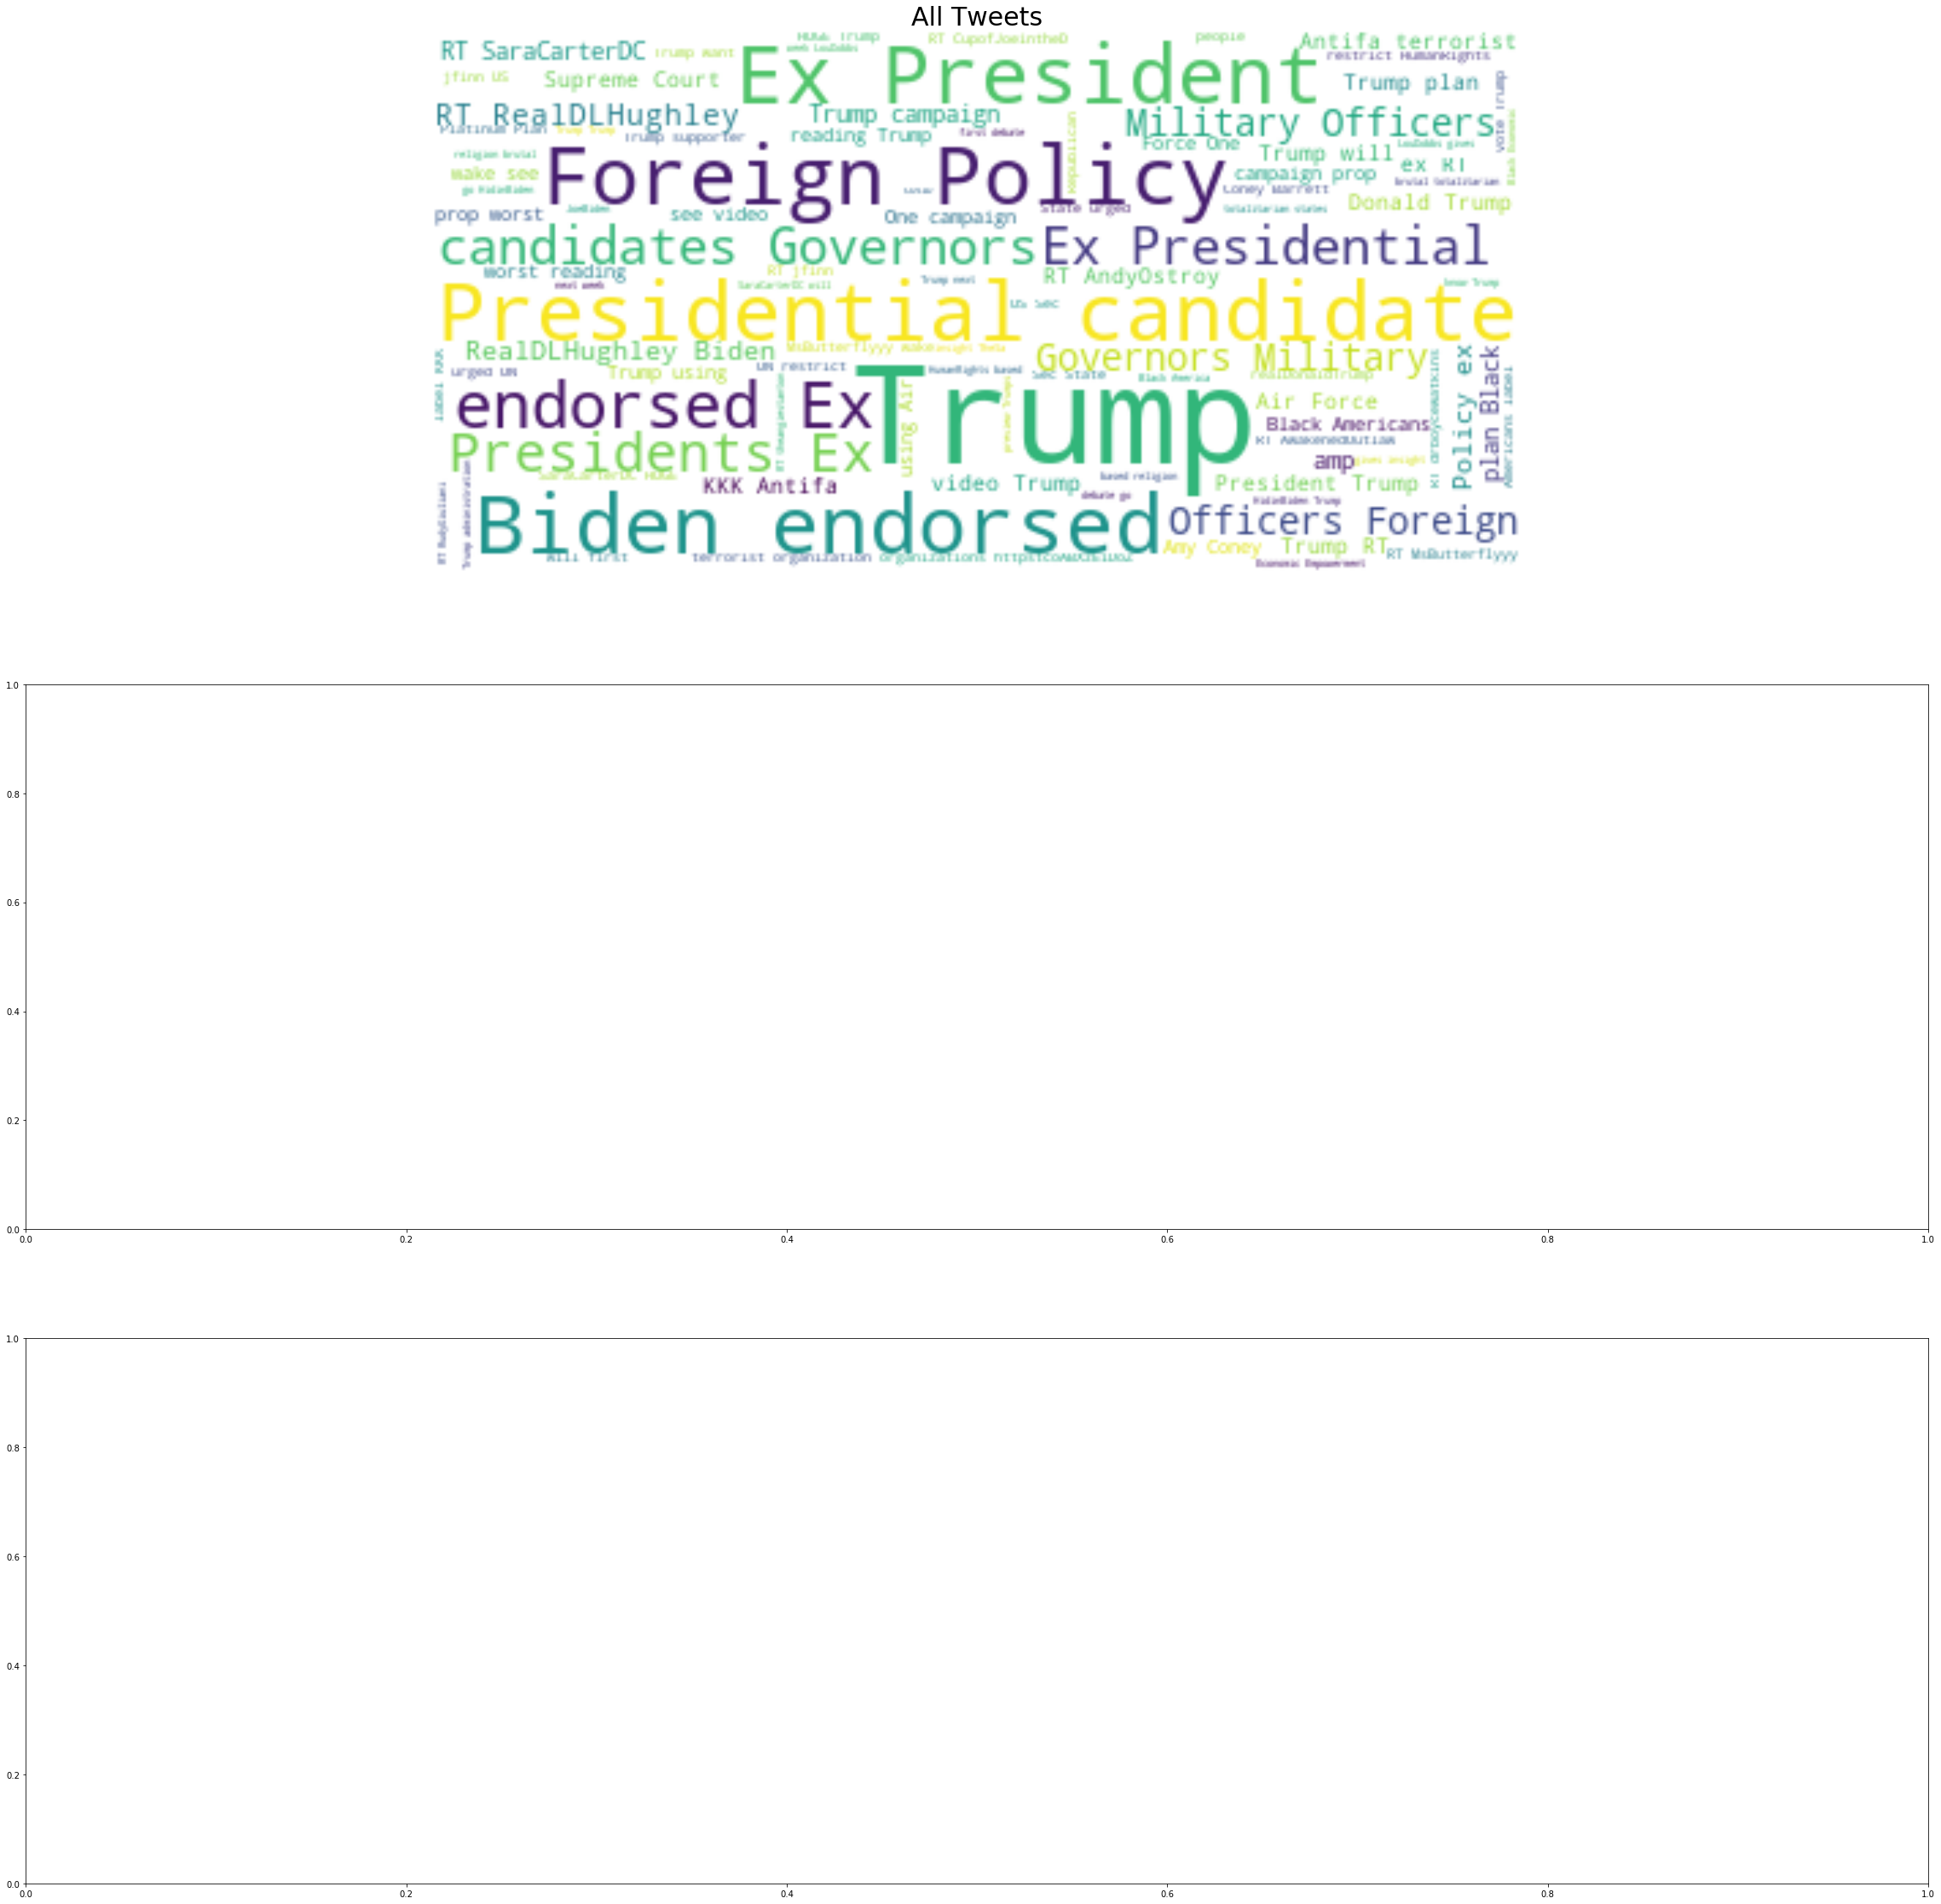

In [16]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import matplotlib.pyplot as plt


tweet_All = " ".join(review for review in df.Tweet_punct)


fig, ax = plt.subplots(3, 1, figsize  = (40,40))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)


# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')





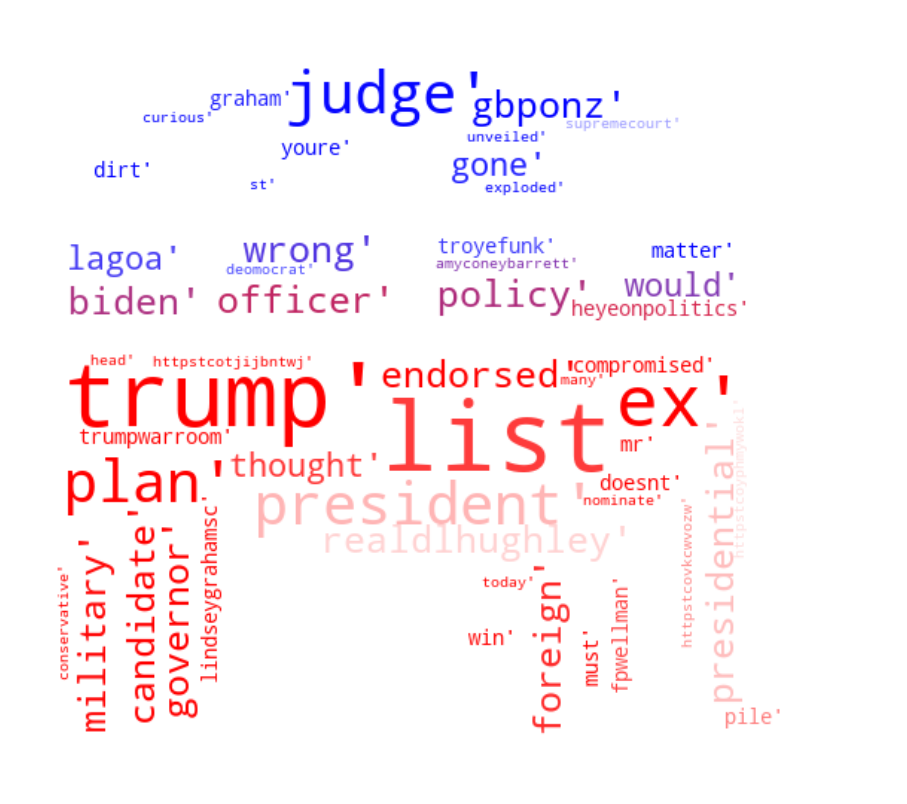

In [19]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

text = df["Tweet_lemmatized"].values 

mask = np.array(Image.open("republican.png"))


my_stop_words=STOPWORDS


# Create and generate a word cloud image
my_cloud = WordCloud(height=1200, width=800,background_color='white',mask=mask,max_words=200,stopwords=my_stop_words).generate(str(text))

image_colors = ImageColorGenerator(mask)
# Display the generated wordcloud image
plt.figure(figsize=[16,16])
plt.imshow(my_cloud.recolor(color_func=image_colors), interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()






In [24]:
# Import the word cloud function 
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt

text = df["tweetText"].values.decode('utf-8')

my_stop_words=STOPWORDS.update(['bartolito'])


# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white',stopwords=my_stop_words).generate(text)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()




AttributeError: 'numpy.ndarray' object has no attribute 'decode'